In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matlplotlib inline

UsageError: Line magic function `%matlplotlib` not found.


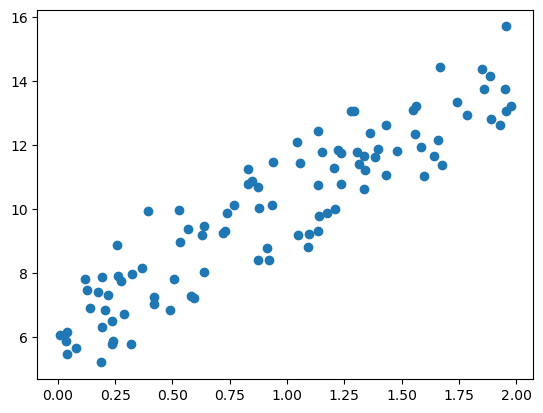

In [362]:
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6+4 * X+np.random.randn(100,1)

plt.scatter(X,y)

In [363]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape 와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T)+ w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update


In [364]:
a =np.zeros((1,1))

In [365]:
a

array([[0.]])

[67.30998637]


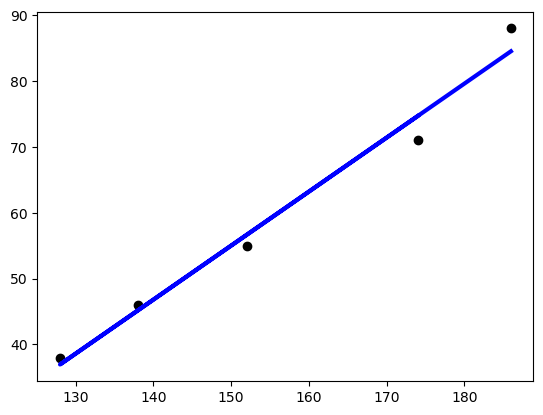

In [366]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174],[152],[138],[128],[186]]
y = [71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[165]]))

plt.scatter(X,y, color='black')

y_pred = reg.predict(X)
plt.plot(X, y_pred, color='blue',linewidth=3)
plt.show()

In [367]:
y_pred

array([74.69188821, 56.64723926, 45.16428085, 36.96216769, 84.53442399])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF

(506, 14)


c:\Users\qkrtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot: xlabel='ZN', ylabel='PRICE'>

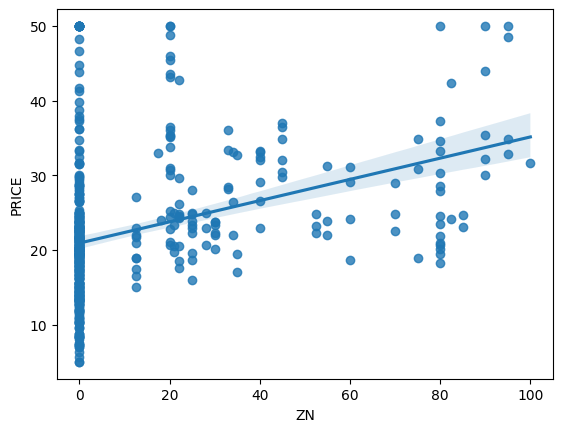

In [3]:
sns.regplot(x='ZN', y='PRICE', data=bostonDF)

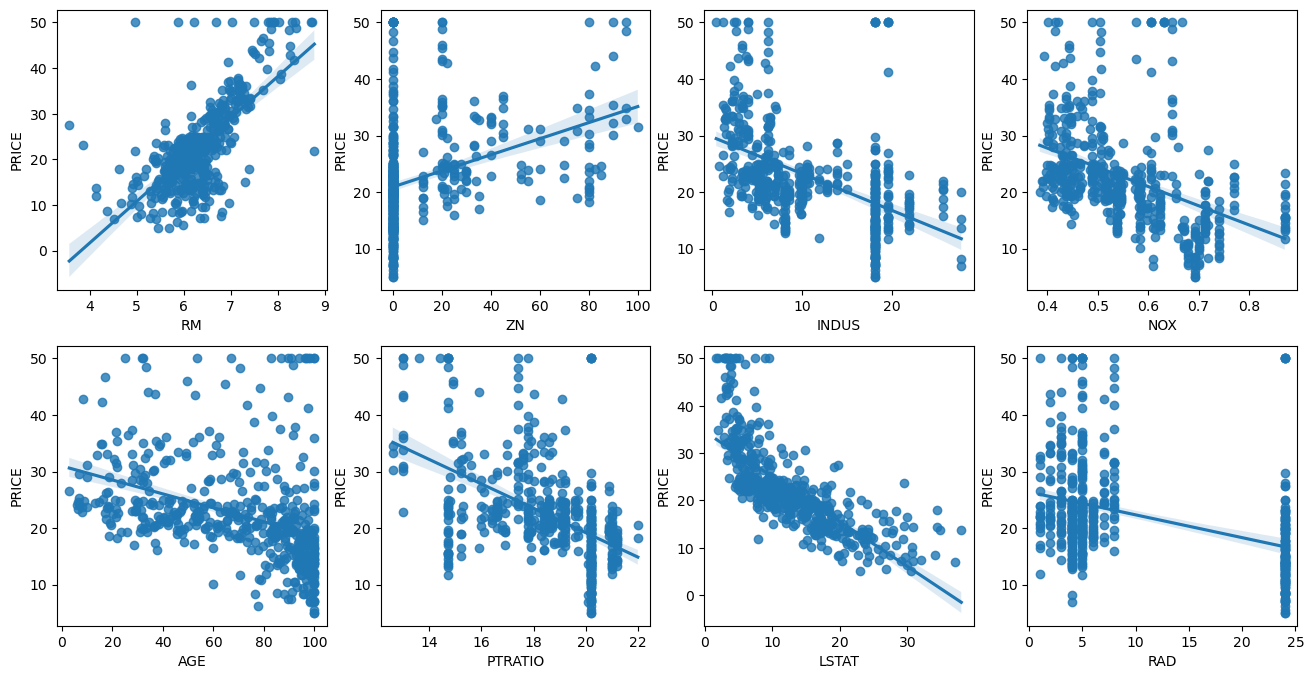

In [369]:
fig, axs = plt.subplots(figsize=(16,8), ncols =4, nrows=2)
lm_features = ["RM","ZN","INDUS","NOX", "AGE", "PTRATIO", "LSTAT","RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data= bostonDF, ax = axs[row][col])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=11)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 25.014, RMSE : 5.001
Variance score : 0.726
절편 값: 32.6003842095853
회귀 계수값: [-1.07700e-01  4.68000e-02  4.27000e-02  2.72100e+00 -1.90033e+01
  4.10790e+00  1.55000e-02 -1.34230e+00  3.68900e-01 -1.55000e-02
 -9.07600e-01  1.09000e-02 -5.04700e-01]


In [12]:
coeff = pd.Series(data=np.round(lr.coef_,4), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          4.1079
CHAS        2.7210
RAD         0.3689
ZN          0.0468
INDUS       0.0427
AGE         0.0155
B           0.0109
TAX        -0.0155
CRIM       -0.1077
LSTAT      -0.5047
PTRATIO    -0.9076
DIS        -1.3423
NOX       -19.0033
dtype: float64

In [5]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace =False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5.828658946215815


In [372]:
#스케일링 전 샤피로 테스트(2000개 이하)
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in bostonDF.columns:
    a = stats.shapiro(bostonDF[i])
    p = a.pvalue   
    print(i,p)

CRIM 1.3285678005931464e-36
ZN 7.882576753156324e-34
INDUS 1.0642375893751083e-17
CHAS 2.350467979135232e-40
NOX 5.775851259944009e-14
RM 2.4107271734408187e-10
AGE 2.2311304847966706e-18
DIS 2.1851281171594835e-17
RAD 8.072354053650428e-30
TAX 1.1629790572690724e-23
PTRATIO 2.359104548622454e-17
B 6.057845995608311e-36
LSTAT 8.285112504911873e-14
PRICE 4.939965499209636e-16


In [373]:
#스케일링 전 ks테스트(2000개 이상)
for i in bostonDF.columns:
    a = kstest(bostonDF[i],'norm')
    p = a.pvalue
    print(i,p)

CRIM 9.101764614072126e-119
ZN 1.6871111181943858e-117
INDUS 0.0
CHAS 1.6871111181943858e-117
NOX 2.7133228490861947e-209
RM 0.0
AGE 0.0
DIS 0.0
RAD 0.0
TAX 0.0
PTRATIO 0.0
B 0.0
LSTAT 0.0
PRICE 0.0


C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_6980\3048512814.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bostonDF[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_6980\3048512814.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bo

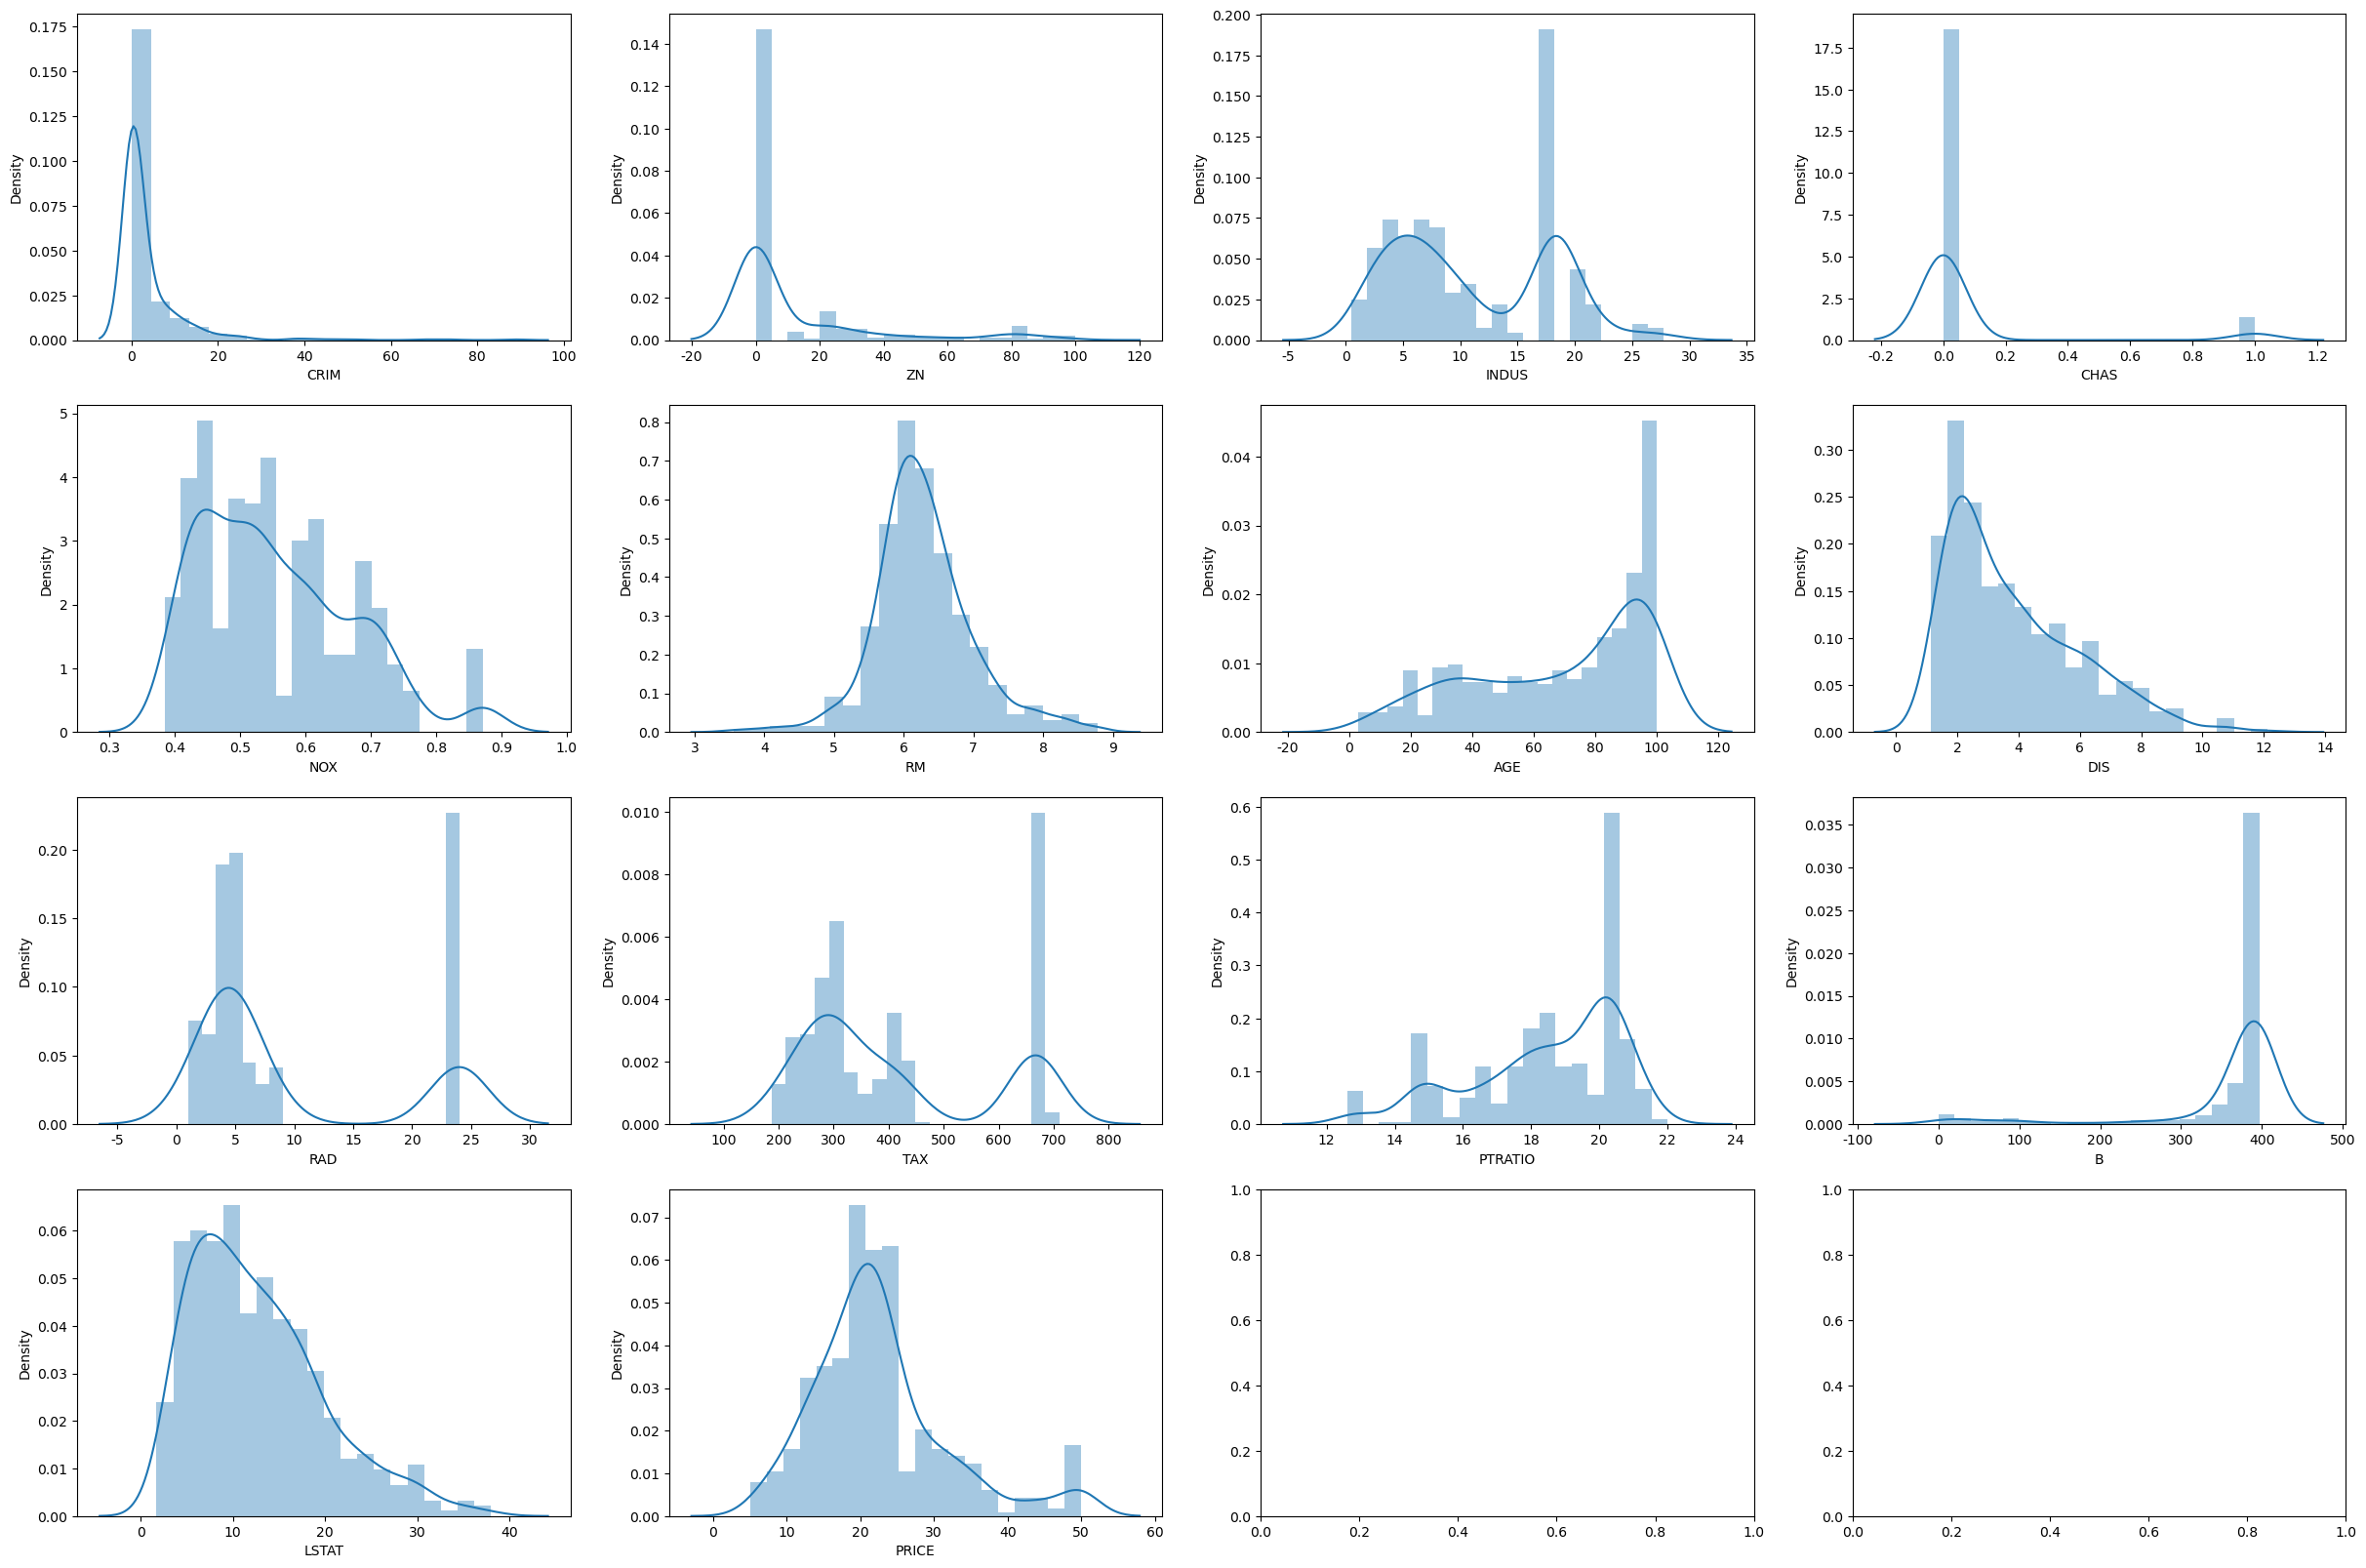

In [374]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(bostonDF.columns):
    sns.distplot(bostonDF[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
PRICE


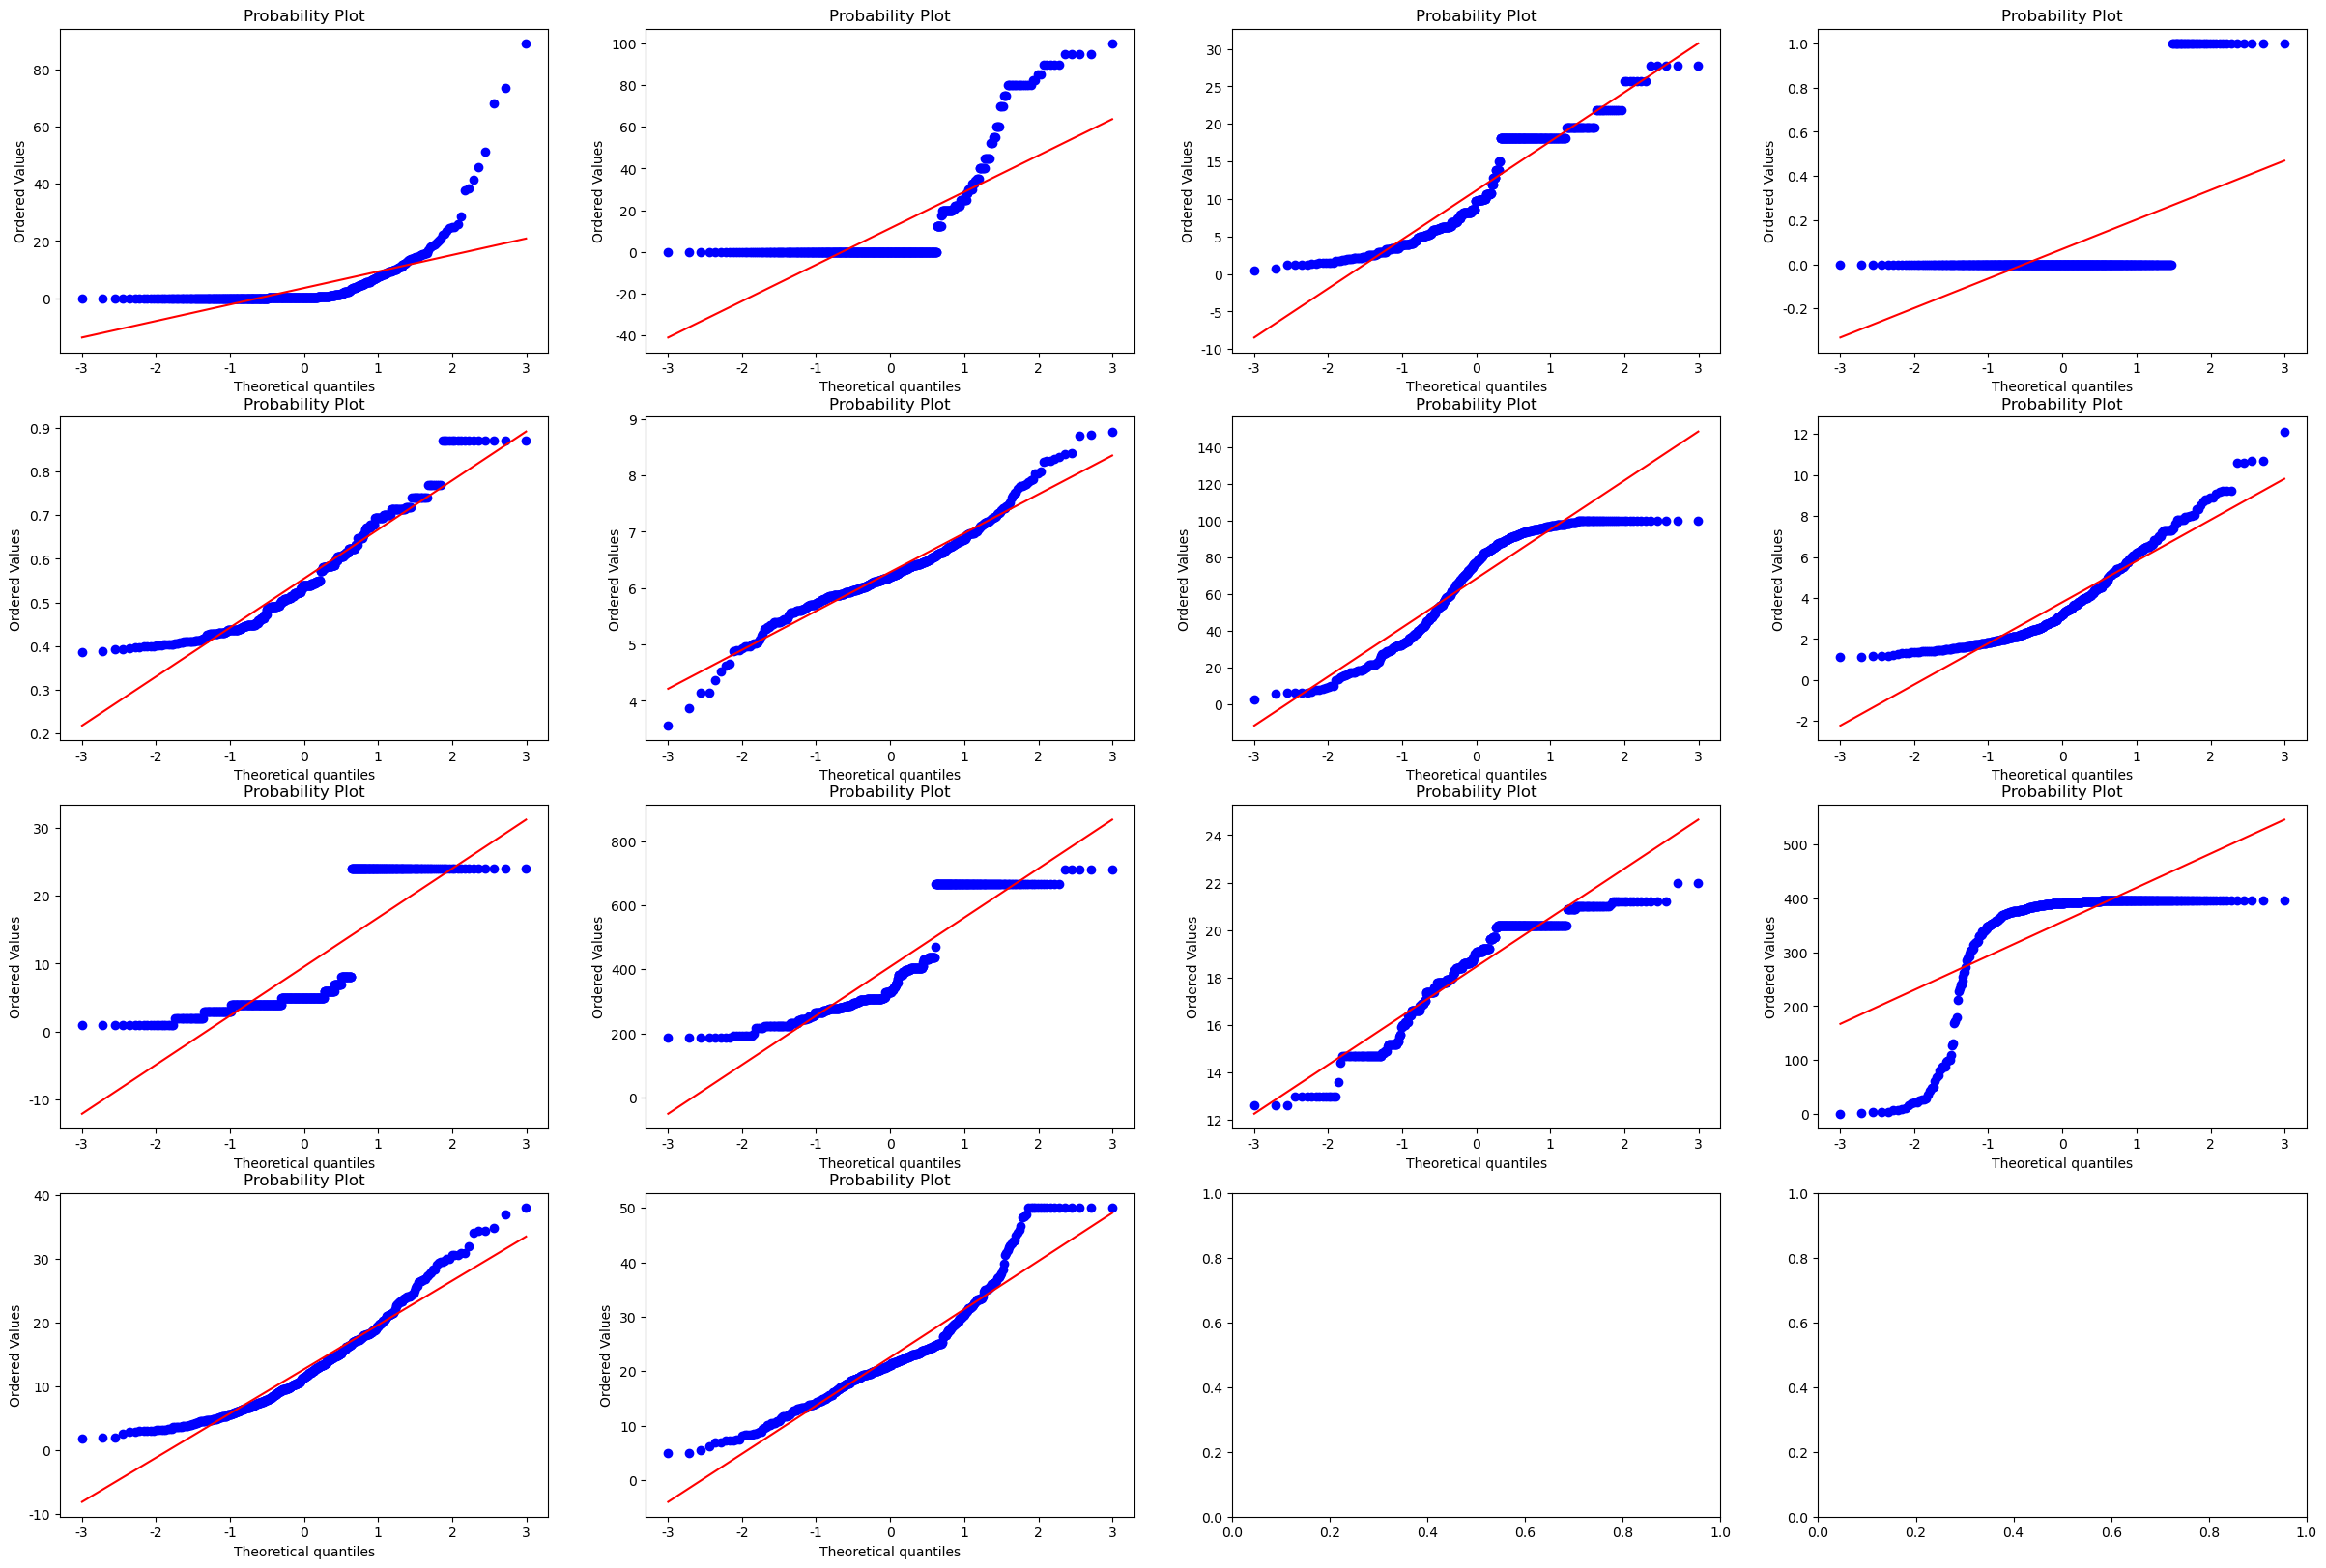

In [375]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(bostonDF.columns):
    stats.probplot(bostonDF[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)


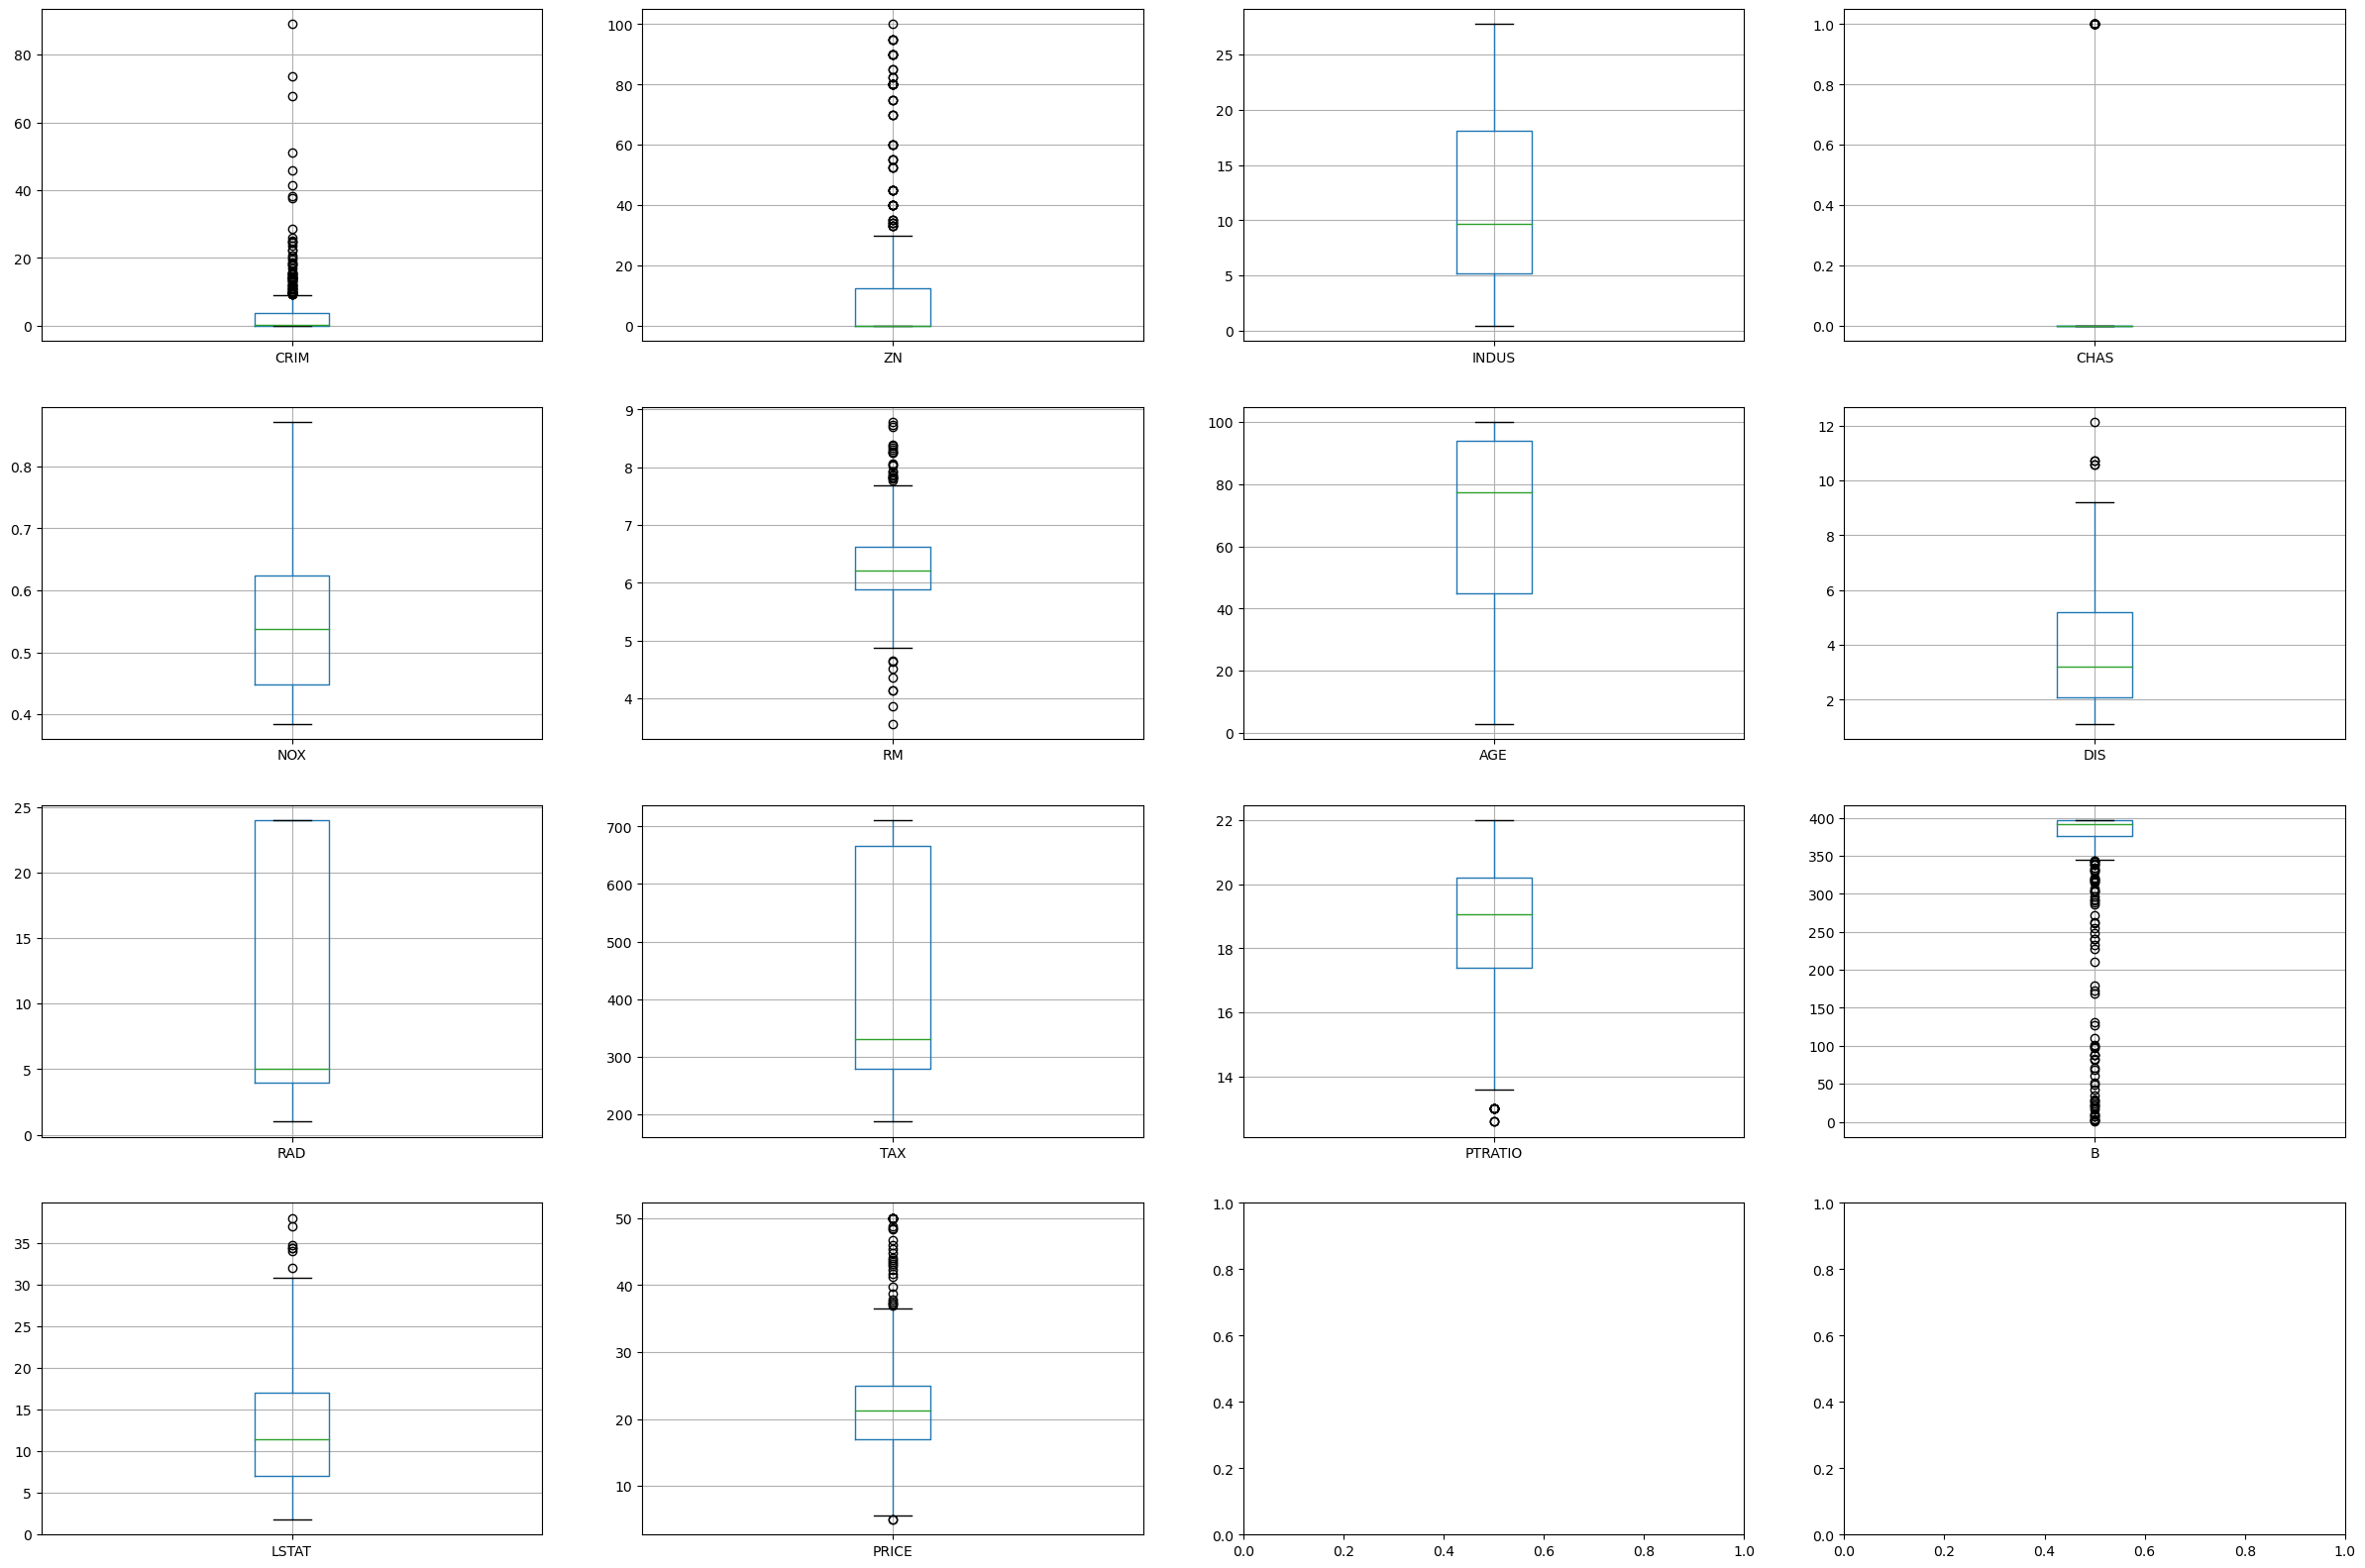

In [376]:
from matplotlib import rc 
col_n = 4
row_n = 4

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(bostonDF.columns):
    bostonDF.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [377]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        16:12:53   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9956      6.319      6.487      0.000      28.566      53.425
CRIM          -0.1130      0.051     -2.210      0.028      -0.214      -0.012
ZN             0.0655      0.017      3.804      0.000       0.032       0.099
INDUS          0.0344      0.082      0.421      0.674      -0.126       0.195
CHAS           3.0459      1.149      2.651      0.008       0.786       5.306
NOX          -19.7958      4.767     -4.153      0.000     -29.172     -10.420
RM             3.3550      0.507      6.618      0.000       2.358       4.352
AGE            0.0059      0.016      0.367      0.714      -0.026       0.038
DIS           -1.7419      0.251     -6.941      0.000      -2.235      -1.248
RAD            0.3559      0.086      4.151      0.000       0.187       0.525
TAX           -0.0143      0.005     -2.904      0.004      -0.024      -0.005
PTRATIO       -0.9202      0.169     -5.456      0.000      -1.252      -0.588
B              0.0104      0.004      2.937      0.004       0.003       0.017
LSTAT         -0.5662      0.060     -9.421      0.000      -0.684      -0.448
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [378]:
X_train.drop(['AGE'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     75.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.70e-88
Time:                        16:12:53   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2162.
Df Residuals:                     341   BIC:                             2212.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9052      6.306      6.486      0.000      28.501      53.310
CRIM          -0.1125      0.051     -2.204      0.028      -0.213      -0.012
ZN             0.0645      0.017      3.799      0.000       0.031       0.098
INDUS          0.0362      0.082      0.444      0.657      -0.124       0.197
CHAS           3.0529      1.147      2.661      0.008       0.796       5.309
NOX          -19.3804      4.624     -4.191      0.000     -28.476     -10.285
RM             3.3888      0.498      6.807      0.000       2.410       4.368
DIS           -1.7650      0.243     -7.275      0.000      -2.242      -1.288
RAD            0.3549      0.086      4.147      0.000       0.187       0.523
TAX           -0.0143      0.005     -2.905      0.004      -0.024      -0.005
PTRATIO       -0.9184      0.168     -5.455      0.000      -1.250      -0.587
B              0.0105      0.004      2.965      0.003       0.004       0.017
LSTAT         -0.5600      0.058     -9.722      0.000      -0.673      -0.447
==============================================================================
Omnibus:                      112.336   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.852
Skew:                           1.403   Prob(JB):                     2.43e-82
Kurtosis:                       7.196   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [379]:
X_train.drop(['INDUS'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     82.83
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.01e-89
Time:                        16:12:53   Log-Likelihood:                -1068.1
No. Observations:                 354   AIC:                             2160.
Df Residuals:                     342   BIC:                             2207.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7481      6.289      6.479      0.000      28.378      53.118
CRIM          -0.1138      0.051     -2.236      0.026      -0.214      -0.014
ZN             0.0638      0.017      3.778      0.000       0.031       0.097
CHAS           3.1058      1.140      2.725      0.007       0.864       5.347
NOX          -18.8252      4.447     -4.233      0.000     -27.572     -10.079
RM             3.3713      0.496      6.801      0.000       2.396       4.346
DIS           -1.7901      0.236     -7.596      0.000      -2.254      -1.327
RAD            0.3444      0.082      4.191      0.000       0.183       0.506
TAX           -0.0133      0.004     -3.052      0.002      -0.022      -0.005
PTRATIO       -0.9108      0.167     -5.445      0.000      -1.240      -0.582
B              0.0104      0.004      2.952      0.003       0.003       0.017
LSTAT         -0.5573      0.057     -9.741      0.000      -0.670      -0.445
==============================================================================
Omnibus:                      112.572   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.664
Skew:                           1.405   Prob(JB):                     9.80e-83
Kurtosis:                       7.208   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor  Feature
0     2.516531     CRIM
1     2.651766       ZN
2     1.128917     CHAS
3    59.641591      NOX
4    74.170738       RM
5    12.011486      DIS
6    14.703007      RAD
7    51.343116      TAX
8    84.097060  PTRATIO
9    21.480716        B
10    9.359484    LSTAT


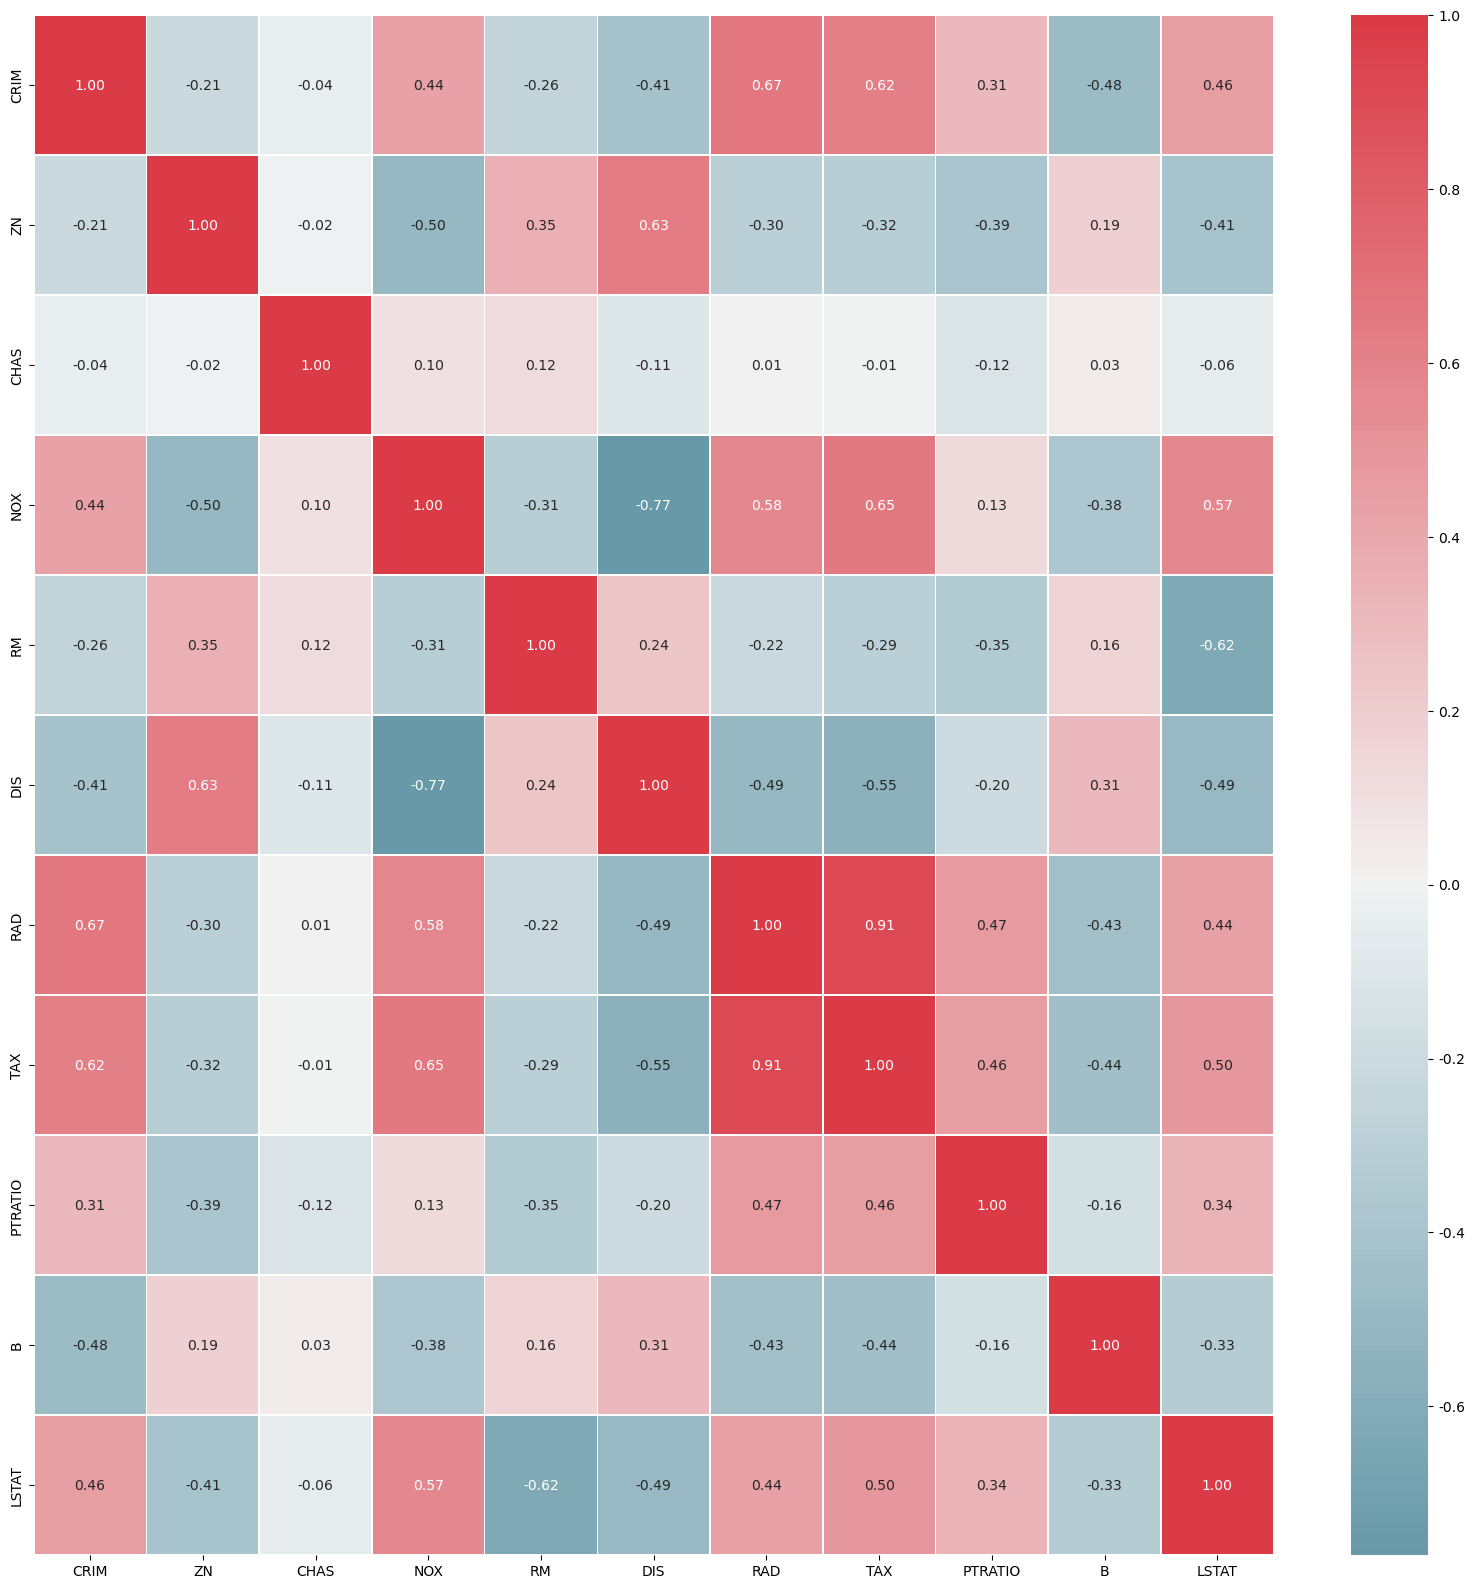

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [383]:
X_train.drop(['PTRATIO'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     81.36
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.79e-84
Time:                        16:14:01   Log-Likelihood:                -1082.8
No. Observations:                 354   AIC:                             2188.
Df Residuals:                     343   BIC:                             2230.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7267      5.168      3.817      0.000       9.562      29.891
CRIM          -0.1037      0.053     -1.960      0.051      -0.208       0.000
ZN             0.0980      0.016      6.013      0.000       0.066       0.130
CHAS           3.4598      1.184      2.921      0.004       1.130       5.789
NOX          -10.0949      4.317     -2.338      0.020     -18.587      -1.603
RM             3.7350      0.511      7.305      0.000       2.729       4.741
DIS           -1.8622      0.245     -7.603      0.000      -2.344      -1.380
RAD            0.2704      0.084      3.205      0.001       0.104       0.436
TAX           -0.0173      0.004     -3.869      0.000      -0.026      -0.008
B              0.0097      0.004      2.650      0.008       0.003       0.017
LSTAT         -0.5963      0.059    -10.093      0.000      -0.713      -0.480
==============================================================================
Omnibus:                      100.622   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.340
Skew:                           1.298   Prob(JB):                     4.47e-65
Kurtosis:                       6.653   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor Feature
0    2.506778    CRIM
1    2.166587      ZN
2    1.122752    CHAS
3   59.637537     NOX
4   56.620655      RM
5    9.843986     DIS
6   14.700190     RAD
7   47.253743     TAX
8   19.864546       B
9    8.286045   LSTAT


In [385]:
X_train.drop(['NOX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     88.64
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.21e-84
Time:                        16:14:35   Log-Likelihood:                -1085.6
No. Observations:                 354   AIC:                             2191.
Df Residuals:                     344   BIC:                             2230.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8619      4.547      3.048      0.002       4.918      22.806
CRIM          -0.0916      0.053     -1.728      0.085      -0.196       0.013
ZN             0.0983      0.016      5.993      0.000       0.066       0.131
CHAS           3.1902      1.186      2.689      0.008       0.857       5.524
RM             3.7327      0.515      7.254      0.000       2.721       4.745
DIS           -1.5651      0.211     -7.427      0.000      -1.980      -1.151
RAD            0.2699      0.085      3.179      0.002       0.103       0.437
TAX           -0.0192      0.004     -4.368      0.000      -0.028      -0.011
B              0.0106      0.004      2.892      0.004       0.003       0.018
LSTAT         -0.6274      0.058    -10.829      0.000      -0.741      -0.513
==============================================================================
Omnibus:                      103.816   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.542
Skew:                           1.323   Prob(JB):                     4.10e-70
Kurtosis:                       6.829   Cond. No.                     9.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [386]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor Feature
0    2.504474    CRIM
1    2.122492      ZN
2    1.114582    CHAS
3   32.197810      RM
4    8.701649     DIS
5   14.440873     RAD
6   40.949895     TAX
7   19.662767       B
8    6.160301   LSTAT


In [387]:
X_train.drop(['TAX'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     92.49
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.19e-81
Time:                        16:14:57   Log-Likelihood:                -1095.2
No. Observations:                 354   AIC:                             2208.
Df Residuals:                     345   BIC:                             2243.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0549      4.290      1.412      0.159      -2.382      14.492
CRIM          -0.0754      0.054     -1.390      0.165      -0.182       0.031
ZN             0.0877      0.017      5.267      0.000       0.055       0.120
CHAS           3.4601      1.215      2.847      0.005       1.070       5.851
RM             4.0392      0.523      7.724      0.000       3.011       5.068
DIS           -1.3169      0.208     -6.325      0.000      -1.726      -0.907
RAD           -0.0416      0.047     -0.881      0.379      -0.135       0.051
B              0.0118      0.004      3.147      0.002       0.004       0.019
LSTAT         -0.6502      0.059    -10.984      0.000      -0.767      -0.534
==============================================================================
Omnibus:                       95.234   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.482
Skew:                           1.241   Prob(JB):                     1.84e-59
Kurtosis:                       6.490   Cond. No.                     5.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [388]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor Feature
0    2.502606    CRIM
1    2.117654      ZN
2    1.111018    CHAS
3   25.376661      RM
4    8.558682     DIS
5    4.519778     RAD
6   19.508860       B
7    5.076331   LSTAT


In [389]:
X_train.drop(['RM'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     83.09
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.06e-70
Time:                        16:15:22   Log-Likelihood:                -1123.4
No. Observations:                 354   AIC:                             2263.
Df Residuals:                     346   BIC:                             2294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8461      2.030     17.660      0.000      31.854      39.838
CRIM          -0.0952      0.059     -1.624      0.105      -0.210       0.020
ZN             0.1163      0.018      6.629      0.000       0.082       0.151
CHAS           4.2076      1.310      3.211      0.001       1.631       6.785
DIS           -1.5896      0.222     -7.164      0.000      -2.026      -1.153
RAD           -0.0290      0.051     -0.569      0.570      -0.129       0.071
B              0.0103      0.004      2.532      0.012       0.002       0.018
LSTAT         -0.9050      0.053    -17.027      0.000      -1.010      -0.800
==============================================================================
Omnibus:                       80.622   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.065
Skew:                           1.273   Prob(JB):                     5.21e-32
Kurtosis:                       4.814   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [390]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor Feature
0    2.483251    CRIM
1    2.115792      ZN
2    1.090270    CHAS
3    7.530126     DIS
4    4.035099     RAD
5    9.287412       B
6    4.994928   LSTAT


In [391]:
X_train.drop(['RAD'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     97.07
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.49e-71
Time:                        16:15:48   Log-Likelihood:                -1123.6
No. Observations:                 354   AIC:                             2261.
Df Residuals:                     347   BIC:                             2288.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4477      1.903     18.624      0.000      31.704      39.191
CRIM          -0.1116      0.051     -2.189      0.029      -0.212      -0.011
ZN             0.1164      0.018      6.642      0.000       0.082       0.151
CHAS           4.1948      1.309      3.205      0.001       1.621       6.769
DIS           -1.5628      0.217     -7.214      0.000      -1.989      -1.137
B              0.0105      0.004      2.625      0.009       0.003       0.018
LSTAT         -0.9072      0.053    -17.130      0.000      -1.011      -0.803
==============================================================================
Omnibus:                       79.974   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.711
Skew:                           1.268   Prob(JB):                     1.69e-31
Kurtosis:                       4.781   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [392]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor Feature
0    1.669121    CRIM
1    2.112227      ZN
2    1.086275    CHAS
3    7.495790     DIS
4    8.765650       B
5    4.619834   LSTAT


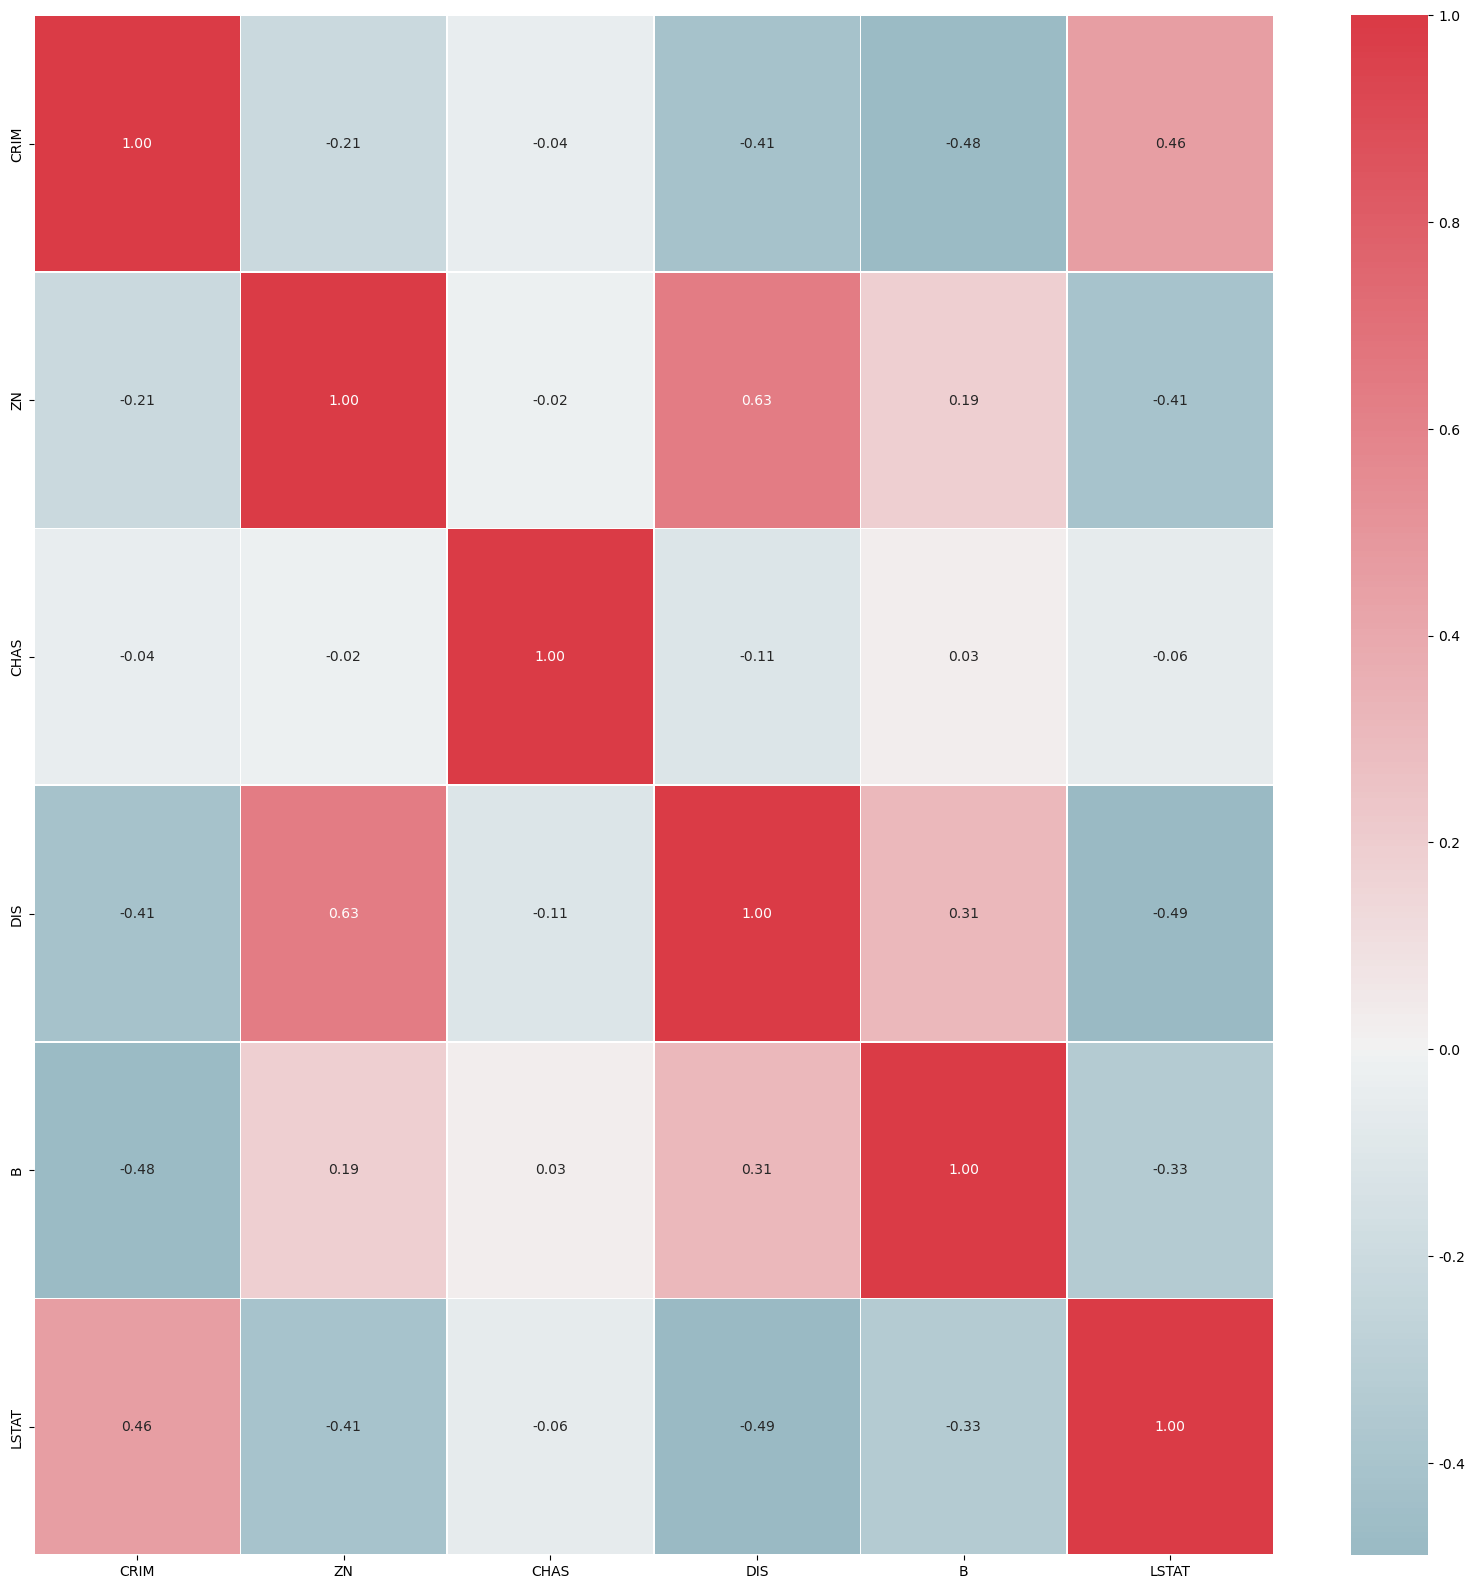

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [395]:
X_train.columns
X_test = X_test[['CRIM', 'ZN', 'CHAS', 'DIS', 'B', 'LSTAT']]

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 30.165, RMSE : 5.492
Variance score : 0.577
절편 값: 35.44774759590925
회귀 계수값: [-0.1116  0.1164  4.1948 -1.5628  0.0105 -0.9072]


In [381]:
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = minmax_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = minmax_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = minmax_scaler.inverse_transform(X_train_scaled)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train)
y_train.reset_index(drop='index', inplace=True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop='index', inplace=True)

c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AGE
- INDUS

  warnings.warn(message, FutureWarning)


ValueError: X has 13 features, but MinMaxScaler is expecting 11 features as input.

In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        09:57:24   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4424      2.930      9.707      0.000      22.679      34.206
CRIM          -8.3068      3.758     -2.210      0.028     -15.700      -0.914
ZN             6.5512      1.722      3.804      0.000       3.164       9.939
INDUS          0.9394      2.231      0.421      0.674      -3.449       5.328
CHAS           3.0459      1.149      2.651      0.008       0.786       5.306
NOX           -9.5416      2.297     -4.153      0.000     -14.061      -5.022
RM            17.5096      2.646      6.618      0.000      12.306      22.713
AGE            0.5765      1.572      0.367      0.714      -2.515       3.668
DIS          -19.1550      2.760     -6.941      0.000     -24.583     -13.727
RAD            8.1853      1.972      4.151      0.000       4.307      12.064
TAX           -7.4908      2.579     -2.904      0.004     -12.564      -2.418
PTRATIO       -7.9135      1.450     -5.456      0.000     -10.766      -5.061
B              4.0994      1.396      2.937      0.004       1.354       6.845
LSTAT        -20.5184      2.178     -9.421      0.000     -24.802     -16.235
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: [28.44239986]
회귀 계수값: [[ -8.3068   6.5512   0.9394   3.0459  -9.5416  17.5096   0.5765 -19.155
    8.1853  -7.4908  -7.9135   4.0994 -20.5184]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_data)

X_scaled = minmax_scaler.transform(X_data)


X_train_a, X_test_a, y_train, y_test = train_test_split(X_scaled, y_target, test_size= 0.3, random_state=156)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = minmax_scaler.inverse_transform(X_train_scaled)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_a, y_train)
y_preds = lr.predict(X_test_a)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: 28.49818846594234
회귀 계수값: [-10.0518   6.5512   0.9394   3.0459  -9.6208  17.5096   0.5765 -19.155
   8.1853  -7.4908  -8.6497   4.1231 -20.5184]


In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        09:57:24   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4982      2.940      9.694      0.000      22.716      34.281
x1           -10.0518      4.548     -2.210      0.028     -18.997      -1.106
x2             6.5512      1.722      3.804      0.000       3.164       9.939
x3             0.9394      2.231      0.421      0.674      -3.449       5.328
x4             3.0459      1.149      2.651      0.008       0.786       5.306
x5            -9.6208      2.317     -4.153      0.000     -14.177      -5.064
x6            17.5096      2.646      6.618      0.000      12.306      22.713
x7             0.5765      1.572      0.367      0.714      -2.515       3.668
x8           -19.1550      2.760     -6.941      0.000     -24.583     -13.727
x9             8.1853      1.972      4.151      0.000       4.307      12.064
x10           -7.4908      2.579     -2.904      0.004     -12.564      -2.418
x11           -8.6497      1.585     -5.456      0.000     -11.768      -5.532
x12            4.1231      1.404      2.937      0.004       1.362       6.884
x13          -20.5184      2.178     -9.421      0.000     -24.802     -16.235
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
std_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
std_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = std_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = std_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = std_scaler.inverse_transform(X_train_scaled)

In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        09:57:24   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9099      0.268     85.467      0.000      22.383      23.437
x1            -0.8641      0.391     -2.210      0.028      -1.633      -0.095
x2             1.5309      0.402      3.804      0.000       0.739       2.322
x3             0.2350      0.558      0.421      0.674      -0.863       1.333
x4             0.7353      0.277      2.651      0.008       0.190       1.281
x5            -2.3246      0.560     -4.153      0.000      -3.426      -1.224
x6             2.4463      0.370      6.618      0.000       1.719       3.173
x7             0.1674      0.456      0.367      0.714      -0.730       1.065
x8            -3.6121      0.520     -6.941      0.000      -4.636      -2.588
x9             3.1021      0.747      4.151      0.000       1.632       4.572
x10           -2.4250      0.835     -2.904      0.004      -4.067      -0.783
x11           -2.0117      0.369     -5.456      0.000      -2.737      -1.286
x12            0.9311      0.317      2.937      0.004       0.308       1.555
x13           -4.1236      0.438     -9.421      0.000      -4.985      -3.263
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        09:57:24   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9099      0.268     85.467      0.000      22.383      23.437
x1            -0.8641      0.391     -2.210      0.028      -1.633      -0.095
x2             1.5309      0.402      3.804      0.000       0.739       2.322
x3             0.2350      0.558      0.421      0.674      -0.863       1.333
x4             0.7353      0.277      2.651      0.008       0.190       1.281
x5            -2.3246      0.560     -4.153      0.000      -3.426      -1.224
x6             2.4463      0.370      6.618      0.000       1.719       3.173
x7             0.1674      0.456      0.367      0.714      -0.730       1.065
x8            -3.6121      0.520     -6.941      0.000      -4.636      -2.588
x9             3.1021      0.747      4.151      0.000       1.632       4.572
x10           -2.4250      0.835     -2.904      0.004      -4.067      -0.783
x11           -2.0117      0.369     -5.456      0.000      -2.737      -1.286
x12            0.9311      0.317      2.937      0.004       0.308       1.555
x13           -4.1236      0.438     -9.421      0.000      -4.985      -3.263
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = X_data

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                            for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor  Feature
0     2.100373     CRIM
1     2.844013       ZN
2    14.485758    INDUS
3     1.152952     CHAS
4    73.894947      NOX
5    77.948283       RM
6    21.386850      AGE
7    14.699652      DIS
8    15.167725      RAD
9    61.227274      TAX
10   85.029547  PTRATIO
11   20.104943        B
12   11.102025    LSTAT


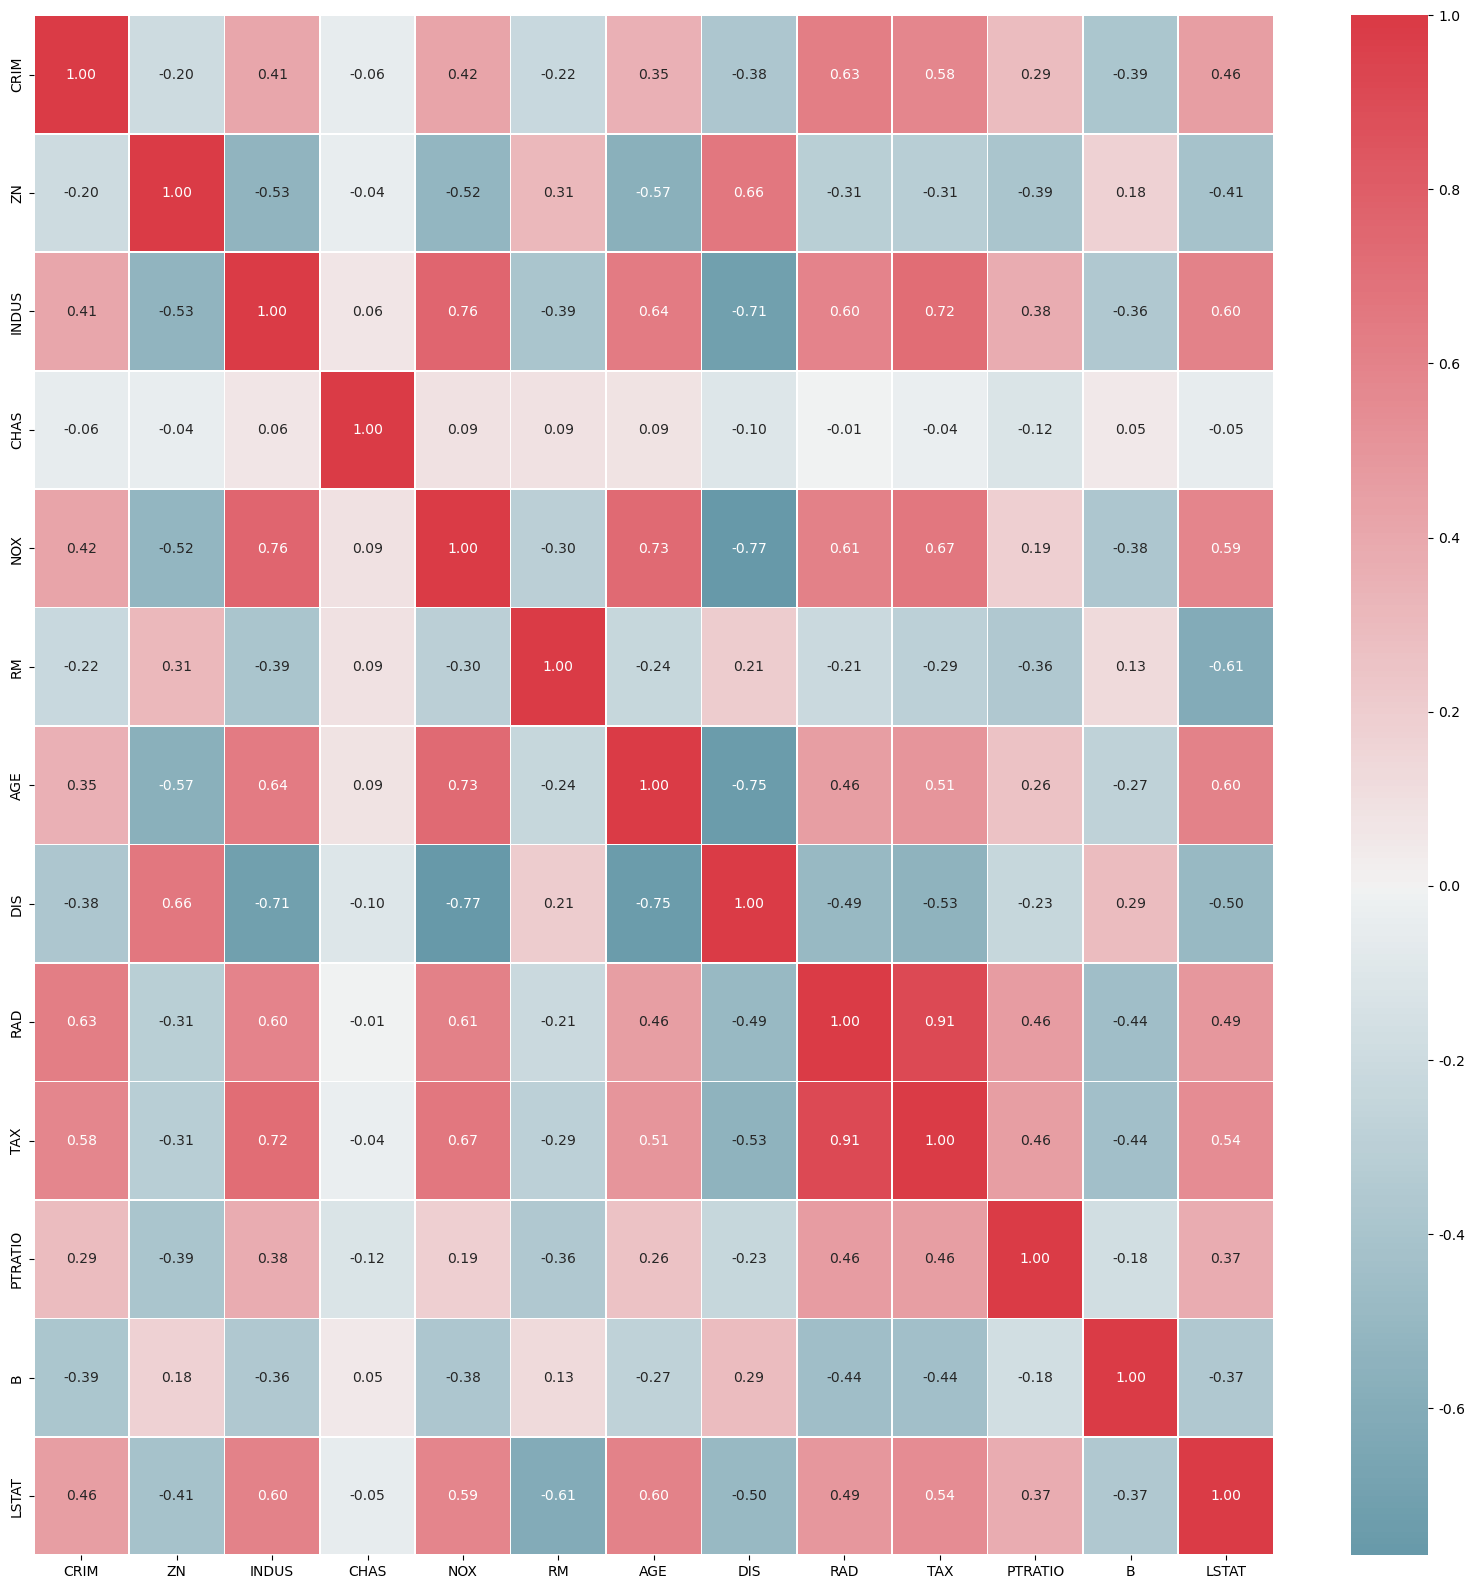

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [ ]:
x_scaled.drop(['1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()